# Financial Analysis

#### This portfolio aims to conduct individual stock analysis from a financial perspective. Data is scraped from Yahoo Finance directly. You can flexibly adjust the stock symbol to generate automated financial analysis report 

In [36]:
# Import libraries
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import urllib.request as ur
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Enter stock symbol
index= 'MSFT'

In [14]:
# URL link 
url_is = 'https://finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://finance.yahoo.com/quote/' + index +'/balance-sheet?p=' + index
url_cf = 'https://finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index

## Web scraping from Yahoo Finance 

### Income Statement

In [15]:
read_data = ur.urlopen(url_is).read()       # Read url 
soup_is= BeautifulSoup(read_data,'lxml')     # Use BeautifulSoup to organize data into lxml
ls= []                                       # Create empty list
for l in soup_is.find_all('div'):           # Find all data structure that is 'div'
    ls.append(l.string)
    
ls = [e for e in ls if e not in ('Operating Expenses','Non-recurring Events')]       # Exclude those columns
new_ls = list(filter(None,ls))                         #Remove None values
new_ls = new_ls[13:]                                   # new list contain rows starting nth

is_data = list(zip(*[iter(new_ls)]*6))                 # Grouping items from old list into new list 
Income_st = pd.DataFrame(is_data[0:])                  # Convert from list to dataframe by group
Income_st.columns = Income_st.iloc[0]                  # Name columns to first row of dataframe

Income_st = Income_st.iloc[1:,]                        # starting to read 1st row
Income_st = Income_st.T                                 # transpose dataframe
Income_st.columns = Income_st.iloc[0]                  # Name columns to first row of dataframe
Income_st.drop(Income_st.index[0],inplace=True)        # Drop first index row
Income_st.index.name = ''                              # Remove the index name
Income_st.rename(index={'ttm': '12/31/2019'},inplace=True)         # Rename ttm in index columns to end of the year
Income_st = Income_st[Income_st.columns[:-5]]       # remove last 5 irrelevant columns 

In [16]:
Income_st

Annual,Total Revenue,Cost of Revenue,Gross Profit,Research Development,Selling General and Administrative,Total Operating Expenses,Operating Income or Loss,Interest Expense,Total Other Income/Expenses Net,Income Before Tax,Income Tax Expense,Income from Continuing Operations,Net Income,Net Income available to common shareholders
,,,,,,,,,,,,,,
12/31/2019,"122,211,000","42,240,000","79,971,000","16,296,000","22,742,000","39,038,000","40,933,000","2,689,000","3,528,000","41,772,000","6,846,000","34,926,000","34,926,000","34,926,000"
6/29/2019,"125,843,000","42,910,000","82,933,000","16,876,000","23,098,000","39,974,000","42,959,000","2,686,000","3,415,000","43,688,000","4,448,000","39,240,000","39,240,000","39,240,000"
6/29/2018,"110,360,000","38,353,000","72,007,000","14,726,000","22,223,000","36,949,000","35,058,000","2,733,000","4,149,000","36,474,000","19,903,000","16,571,000","16,571,000","16,571,000"
6/29/2017,"89,950,000","34,261,000","55,689,000","13,037,000","20,020,000","33,057,000","22,632,000","2,222,000","2,739,000","23,149,000","1,945,000","21,204,000","21,204,000","21,204,000"
6/29/2016,"85,320,000","32,780,000","52,540,000","11,988,000","19,260,000","31,248,000","21,292,000","1,243,000","-298,000","19,751,000","2,953,000","16,798,000","16,798,000","16,798,000"


## Balance Sheet

In [17]:
read_data = ur.urlopen(url_bs).read()
soup_bs= BeautifulSoup(read_data,'lxml')
bs= []
for l in soup_bs.find_all('div'): 
    bs.append(l.string)
    

new_bs = list(filter(None,bs))
new_bs = new_bs[13:]

bs_data = list(zip(*[iter(new_bs)]*5))
balance_st = pd.DataFrame(bs_data[0:])
balance_st.columns = balance_st.iloc[0]

balance_st = balance_st.iloc[1:,]
balance_st = balance_st.T # Transpose
balance_st.columns = balance_st.iloc[0]
balance_st.drop(balance_st.index[0],inplace=True)
balance_st.index.name = ''
# Rename duplicated deferred revenues columns to long-term 
cols = []
count = 1
for column in balance_st.columns:
    if column == 'Deferred revenues':
        cols.append(f'Deferred Revenue_{count}')
        count+=1
        continue
    cols.append(column)
balance_st.columns = cols

In [18]:
balance_st

,Cash And Cash Equivalents,Short Term Investments,Total Cash,Net Receivables,Inventory,Other Current Assets,Total Current Assets,"Gross property, plant and equipment",Accumulated Depreciation,"Net property, plant and equipment",...,Deferred taxes liabilites,Deferred Revenue_2,Other long-term liabilites,Total non-current liabilities,Total Liabilities,Common Stock,Retained Earnings,Accumulated other comprehensive income,Total stockholders' equity,Total liabilites and stockholders' equity
,,,,,,,,,,,,,,,,,,,,,
6/29/2019,"11,356,000","122,463,000","133,819,000","29,524,000","2,063,000","10,146,000","175,552,000","79,186,000","-35,330,000","43,856,000",...,"233,000","4,530,000","7,581,000","114,806,000","184,226,000","78,520,000","24,150,000","-340,000","102,330,000","286,556,000"
6/29/2018,"11,946,000","121,822,000","133,768,000","26,481,000","2,662,000","6,751,000","169,662,000","65,369,000","-29,223,000","36,146,000",...,"541,000","3,815,000","5,211,000","117,642,000","176,130,000","71,223,000","13,682,000","-2,187,000","82,718,000","258,848,000"
6/29/2017,"7,663,000","125,318,000","132,981,000","19,792,000","2,181,000","4,897,000","159,851,000","47,913,000","-24,179,000","23,734,000",...,"531,000","10,377,000","17,184,000","104,165,000","168,692,000","69,315,000","2,648,000","431,000","72,394,000","241,086,000"
6/29/2016,"6,510,000","106,730,000","113,240,000","18,277,000","2,251,000","5,892,000","139,660,000","38,156,000","-19,800,000","18,356,000",...,"1,476,000","6,441,000","13,640,000","62,340,000","121,697,000","68,178,000","2,282,000","1,537,000","71,997,000","193,694,000"


## Cash Flow

In [19]:
read_data = ur.urlopen(url_cf).read()
soup_cf= BeautifulSoup(read_data,'lxml')
cf= []
for l in soup_cf.find_all('div'): 
    cf.append(l.string)
    
new_cf = list(filter(None,cf))
new_cf = new_cf[13:]

cf_data = list(zip(*[iter(new_cf)]*6))
cash_flow = pd.DataFrame(cf_data[0:])
cash_flow.columns = cash_flow.iloc[0]

cash_flow = cash_flow.iloc[1:,]
cash_flow = cash_flow.T
cash_flow.columns = cash_flow.iloc[0]
cash_flow.drop(cash_flow.index[0],inplace=True)
cash_flow.index.name = ''
cash_flow.rename(index={'ttm': '12/31/2019'},inplace=True)
cash_flow.index = pd.to_datetime(cash_flow.index)

In [20]:
cash_flow

Annual,Net Income,Depreciation & amortization,Deferred income taxes,Stock based compensation,Change in working capital,Accounts receivable,Inventory,Accounts Payable,Other working capital,Other non-cash items,...,Common stock repurchased,Dividends Paid,Other financing activites,Net cash used privided by (used for) financing activities,Net change in cash,Cash at beginning of period,Cash at end of period,Operating Cash Flow,Capital Expenditure,Free Cash Flow
,,,,,,,,,,,,,,,,,,,,,
2019-12-31,"34,926,000","11,274,000","-3,105,000","4,474,000","-3,196,000","-1,930,000","138,000","-22,000","33,641,000",-,...,"-17,272,000","-13,516,000","-860,000","-34,240,000","1,991,000","9,221,000","11,290,000","47,495,000","-13,854,000","33,641,000"
2019-06-29,"39,240,000","11,682,000","-3,534,000","4,652,000","-3,525,000","-2,812,000","597,000","232,000","38,260,000",-,...,"-19,543,000","-13,811,000","-675,000","-36,887,000","-590,000","11,946,000","11,356,000","52,185,000","-13,925,000","38,260,000"
2018-06-29,"16,571,000","10,261,000","13,040,000","3,940,000","-3,638,000","-3,862,000","-465,000","1,148,000","32,252,000",-,...,"-10,721,000","-12,699,000","-971,000","-33,590,000","4,283,000","7,663,000","11,946,000","43,884,000","-11,632,000","32,252,000"
2017-06-29,"21,204,000","8,778,000","-3,296,000","3,266,000","1,652,000","-925,000","50,000","81,000","31,378,000","9,976,000",...,"-11,788,000","-11,845,000","-190,000","8,408,000","1,153,000","6,510,000","7,663,000","39,507,000","-8,129,000","31,378,000"
2016-06-29,"16,798,000","6,622,000","332,000","2,668,000","-2,076,000","-530,000","600,000","88,000","24,982,000","8,574,000",...,"-15,969,000","-11,006,000","-369,000","-8,393,000","915,000","5,595,000","6,510,000","33,325,000","-8,343,000","24,982,000"


## Data Preprocessing

In [21]:
# Convert columns from object to numeric and data cleaning
def convert_to_int(df): 
    col = df.columns
    for col in df: 
        temp = df[col].to_string().replace(',','').split('\n') # Replace comma with space and clean out extra spaces
        temp.pop(0)                              #Remove first erronous element
        df.index = pd.to_datetime(df.index)       # Convert index to datetime 
        df[col]= [i[10:].strip() for i in temp] # stripping off nth characters
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int) # Transform columns from object to numeric
    return df


In [22]:
convert_to_int(balance_st);
convert_to_int(Income_st);
convert_to_int(cash_flow);

## Ratio Analysis

#### Advanced Dupont model: To seperate financial performance from operation performance on Return on equity

In [23]:
ratio = pd.DataFrame()

In [24]:
ratio['EPS'] = cash_flow['Net Income'] / balance_st['Common Stock']


In [25]:
ratio['effective tax rate']= Income_st['Income Tax Expense']/Income_st['Income Before Tax']

In [26]:
# This subtract financial component from operating component
ratio['net operating margin']= (Income_st['Income Before Tax']+Income_st['Interest Expense']*(1-ratio['effective tax rate']))/Income_st['Total Revenue']





In [27]:
ratio['net operating asset turnover'] = Income_st['Total Revenue']/((balance_st['Total liabilites and stockholders\' equity']+balance_st['Total liabilites and stockholders\' equity'].shift(1))/2)



In [28]:
ratio['Return on NOA']= ratio['net operating margin']*ratio['net operating asset turnover']

In [29]:
ratio['Net financial expense'] = Income_st['Interest Expense']*(1-ratio['effective tax rate'])

In [30]:
ratio['Net borrowing cost']=  ratio['Net financial expense']/(balance_st['Total Liabilities']+balance_st['Total Liabilities'].shift(1)/2)



In [31]:
ratio['spread']= ratio['Return on NOA']-ratio['Net borrowing cost']

In [32]:
ratio['leverage'] =(balance_st['Total Liabilities']+balance_st['Total Liabilities'].shift(-1)/2) / (balance_st['Total liabilites and stockholders\' equity']+balance_st['Total liabilites and stockholders\' equity'].shift(1))/2



In [33]:
ratio['ROE(Advanced dupont)'] = ratio['Return on NOA']+ ratio['leverage']*ratio['spread']

In [34]:
ratio

,EPS,effective tax rate,net operating margin,net operating asset turnover,Return on NOA,Net financial expense,Net borrowing cost,spread,leverage,ROE(Advanced dupont)
,,,,,,,,,,
2016-06-29,0.246384,0.149511,0.243884,0.392474,0.095718,1.057157e+06,0.005131,0.090587,NaN,NaN
2017-06-29,0.305908,0.084021,0.279981,0.359847,0.100751,2.035306e+06,0.007927,0.092824,0.229571,0.122060
2018-06-29,0.232664,0.545676,0.341751,0.404691,0.138304,1.241666e+06,0.004629,0.133675,0.238792,0.170224
2019-06-29,0.499745,0.101813,0.366334,NaN,NaN,2.412531e+06,NaN,NaN,NaN,NaN
2019-12-31,NaN,0.163890,0.360199,NaN,NaN,2.248301e+06,NaN,NaN,NaN,NaN


## Visualization

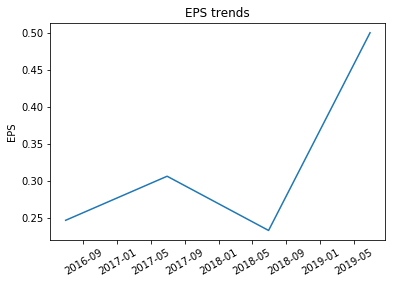

In [41]:
plt.figure()
sns.lineplot(ratio.index,ratio['EPS'])
plt.xticks(rotation=30)
plt.title('EPS trends')
plt.show()

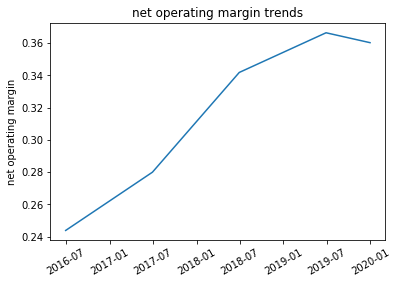

In [42]:
plt.figure()
sns.lineplot(ratio.index,ratio['net operating margin'])
plt.xticks(rotation=30)
plt.title('net operating margin trends')
plt.show()

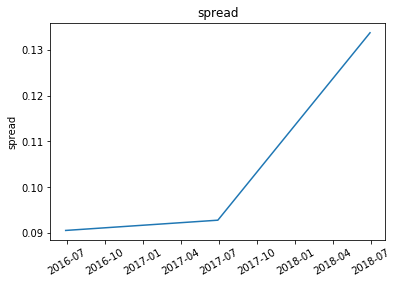

In [43]:
plt.figure()
sns.lineplot(ratio.index,ratio['spread'])
plt.xticks(rotation=30)
plt.title('spread')
plt.show()

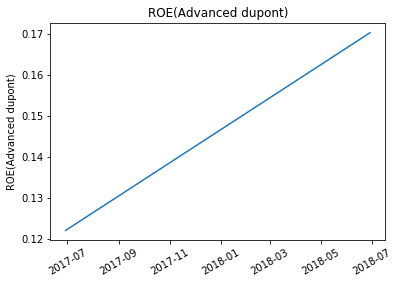

In [50]:
plt.figure()
sns.lineplot(ratio.index,ratio['ROE(Advanced dupont)'])
plt.xticks(rotation=30)
plt.title('ROE(Advanced dupont)')
plt.show()